In [1]:
import pandas as pd
import wget
from datetime import datetime
import matplotlib.pyplot as plt
import os

/Users/jteruya/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Matlabplot Display Parameters

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Import Common Classes

In [3]:
%run common/Equity.ipynb

## Equity Trading Metadata
Provided by Yahoo Finance

In [4]:
def volatility(ticker, days='365d', vol_window=30):
    stock = equity(ticker, days)
    stock.historical_volatility(vol_window)
    stock.min_max_scale('Rolling Volatility')
    return stock.df[~stock.df['Rolling Volatility Scaled'].isna()]['Rolling Volatility Scaled']

## Covid-19 Confirmed Case Data
Sourcing COVID-19 Numbers from [John Hopkins Covid-19 Data Repository](https://github.com/CSSEGISandData/COVID-19).

In [5]:
wget.download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
os.remove('time_series_covid19_confirmed_global.csv')

## Covid-19 US Delta Day Cases
Associated this metric with historical volatility to find a coorelation or pattern to trade on.  This will also serve as our normalization method on this metric.

In [6]:
us_cases = confirmed_df[confirmed_df['Country/Region'] == 'US'].iloc[:,20:].melt(var_name='Date', value_name='Confirmed Cases', col_level=0)
us_cases['Date'] = pd.to_datetime(us_cases['Date'])
us_cases['Percent Change'] = (us_cases['Confirmed Cases'] - us_cases['Confirmed Cases'].shift(1).fillna(0))/us_cases['Confirmed Cases'].shift(1).fillna(0)
us_cases.set_index('Date', inplace=True)

## Percent Change Cases Over Time Visualization (Finance)

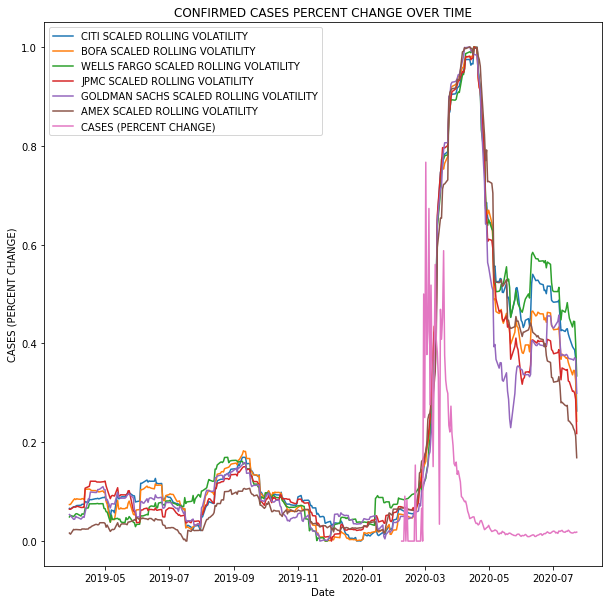

In [7]:
plt.plot(volatility('C'), label="CITI SCALED ROLLING VOLATILITY")
plt.plot(volatility('BAC'), label="BOFA SCALED ROLLING VOLATILITY")
plt.plot(volatility('WFC'), label="WELLS FARGO SCALED ROLLING VOLATILITY")
plt.plot(volatility('JPM'), label="JPMC SCALED ROLLING VOLATILITY")
plt.plot(volatility('GS'), label="GOLDMAN SACHS SCALED ROLLING VOLATILITY")
plt.plot(volatility('AXP'), label="AMEX SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()

## Percent Change Cases Over Time Visualization (Airlines - Travel and Leisure)

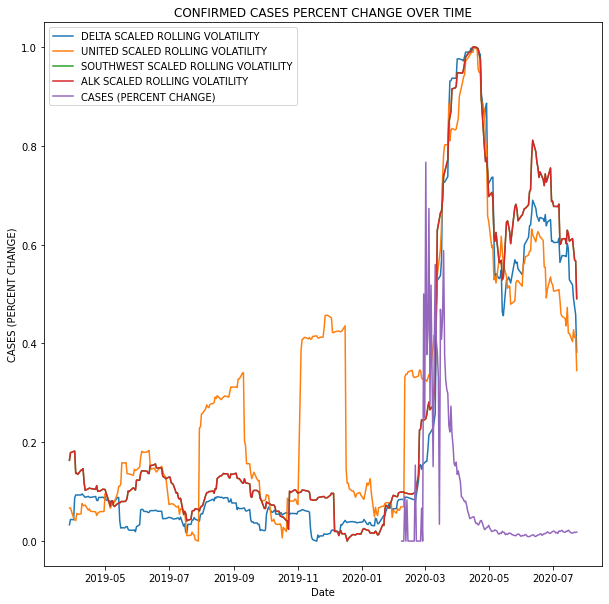

In [8]:
plt.plot(volatility('DAL'), label="DELTA SCALED ROLLING VOLATILITY")
plt.plot(volatility('UA'), label="UNITED SCALED ROLLING VOLATILITY")
plt.plot(volatility('LUV'), label="SOUTHWEST SCALED ROLLING VOLATILITY")
plt.plot(volatility('LUV'), label="ALK SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()

## Percent Change Cases Over Time Visualization (Cruise Lines - Travel and Leisure)

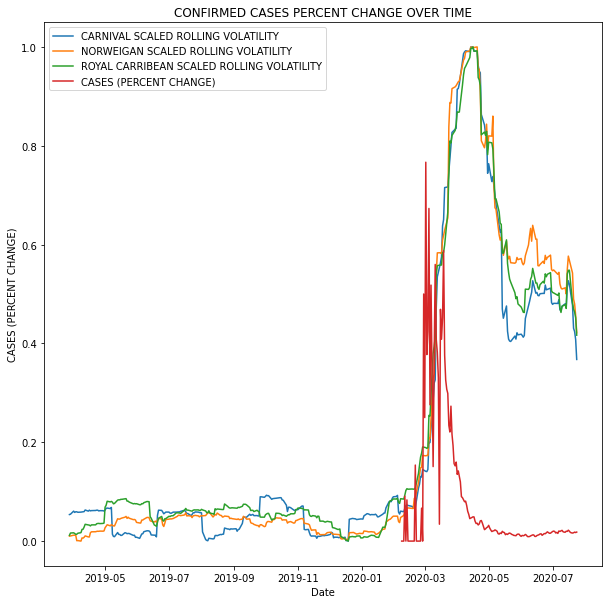

In [9]:
plt.plot(volatility('CCL'), label="CARNIVAL SCALED ROLLING VOLATILITY")
plt.plot(volatility('NCLH'), label="NORWEIGAN SCALED ROLLING VOLATILITY")
plt.plot(volatility('RCL'), label="ROYAL CARRIBEAN SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()

## Percent Change Cases Over Time Visualization (Hotels - Travel and Leisure)

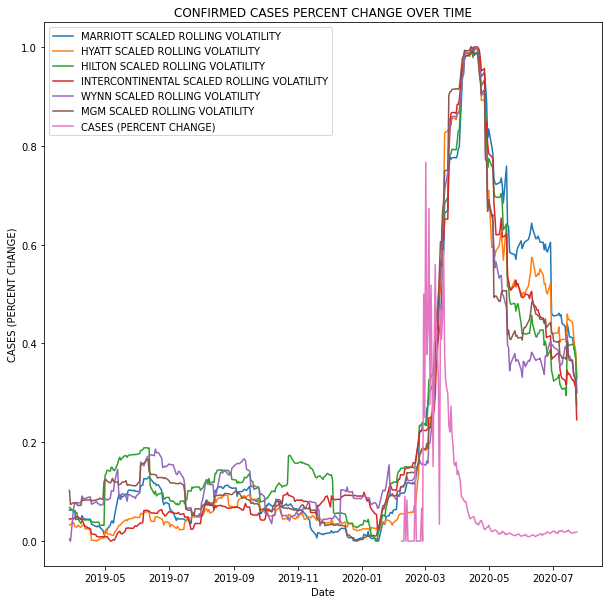

In [10]:
plt.plot(volatility('MAR'), label="MARRIOTT SCALED ROLLING VOLATILITY")
plt.plot(volatility('H'), label="HYATT SCALED ROLLING VOLATILITY")
plt.plot(volatility('HLT'), label="HILTON SCALED ROLLING VOLATILITY")
plt.plot(volatility('IHG'), label="INTERCONTINENTAL SCALED ROLLING VOLATILITY")
plt.plot(volatility('WYNN'), label="WYNN SCALED ROLLING VOLATILITY")
plt.plot(volatility('MGM'), label="MGM SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()

## Percent Change Cases Over Time Visualization (Tech)

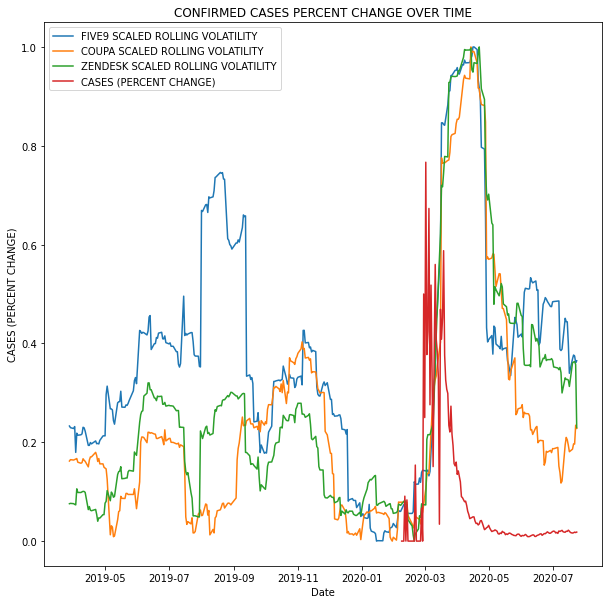

In [11]:
plt.plot(volatility('FIVN'), label="FIVE9 SCALED ROLLING VOLATILITY")
plt.plot(volatility('COUP'), label="COUPA SCALED ROLLING VOLATILITY")
plt.plot(volatility('ZEN'), label="ZENDESK SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()

## Percent Change Cases Over Time Visualization (Index)

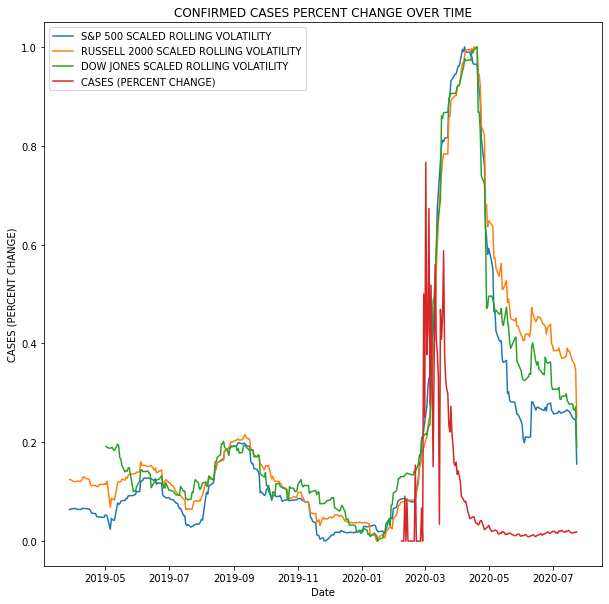

In [12]:
plt.plot(volatility('SPY'), label="S&P 500 SCALED ROLLING VOLATILITY")
plt.plot(volatility('IWM'), label="RUSSELL 2000 SCALED ROLLING VOLATILITY")
plt.plot(volatility('DOW'), label="DOW JONES SCALED ROLLING VOLATILITY")
plt.plot(us_cases['Percent Change'], label="CASES (PERCENT CHANGE)")
plt.xlabel('Date')
plt.ylabel('CASES (PERCENT CHANGE)')
plt.title('CONFIRMED CASES PERCENT CHANGE OVER TIME')
plt.legend()
plt.show()